In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [18]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
import glob 
import pandas as pd


In [19]:
######Tranforming training set to avoid overfitting 
####Called IMAGE AUGMENTATION
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/dataset/training_set',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')
#class_mode 2 outcomes = binary 

Found 990 images belonging to 3 classes.


In [20]:
training_set.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [21]:
###For test data set
val_datagen = ImageDataGenerator(
        rescale=1./255)
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/dataset/Validation',
                                            target_size = (32, 32),
                                           batch_size=32,
                                          class_mode ='categorical') 

Found 120 images belonging to 3 classes.


In [22]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), activation=tf.nn.relu,input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu,padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu,padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    #Output Layer
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(3, activation = tf.nn.softmax)
])


In [23]:
cnn.compile(loss = 'categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(lr = 0.0001),  metrics = ['acc'])

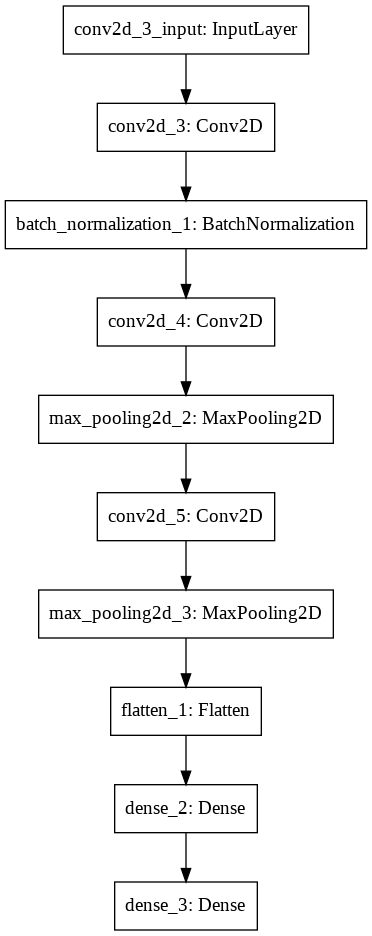

In [24]:
from keras.utils import plot_model
plot_model(cnn)

In [25]:
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [26]:
model=cnn.fit(training_set,validation_data=val_set, epochs=10)

Epoch 1/10
31/31 [==============================] - 12s 401ms/step - loss: 0.6799 - acc: 0.7424 - val_loss: 1.0334 - val_acc: 0.6250
Epoch 2/10
31/31 [==============================] - 12s 390ms/step - loss: 0.2872 - acc: 0.9081 - val_loss: 0.9655 - val_acc: 0.7500
Epoch 3/10
31/31 [==============================] - 12s 391ms/step - loss: 0.1852 - acc: 0.9384 - val_loss: 0.8742 - val_acc: 0.8333
Epoch 4/10
31/31 [==============================] - 12s 396ms/step - loss: 0.1141 - acc: 0.9687 - val_loss: 0.7820 - val_acc: 0.9500
Epoch 5/10
31/31 [==============================] - 12s 396ms/step - loss: 0.1122 - acc: 0.9586 - val_loss: 0.6939 - val_acc: 0.9333
Epoch 6/10
31/31 [==============================] - 12s 394ms/step - loss: 0.0766 - acc: 0.9798 - val_loss: 0.5821 - val_acc: 0.9833
Epoch 7/10
31/31 [==============================] - 13s 411ms/step - loss: 0.0365 - acc: 0.9919 - val_loss: 0.4793 - val_acc: 0.9500
Epoch 8/10
31/31 [==============================] - 13s 421ms/step - 

<function matplotlib.pyplot.show>

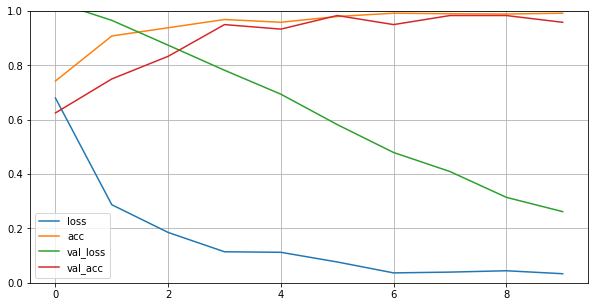

In [27]:
pd.DataFrame(model.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

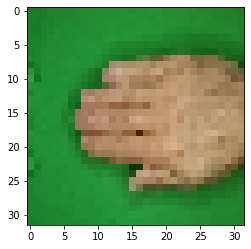

Paper


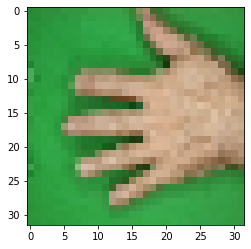

Paper


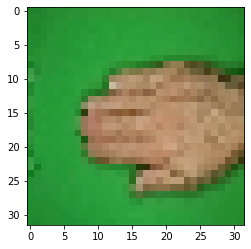

Paper


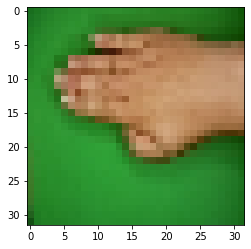

Paper


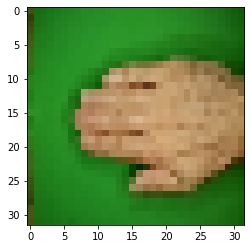

Paper


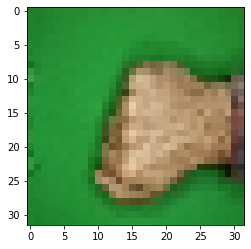

Rock


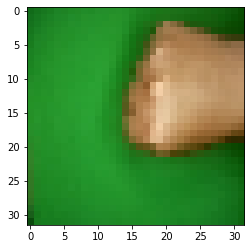

Rock


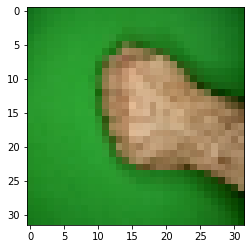

Rock


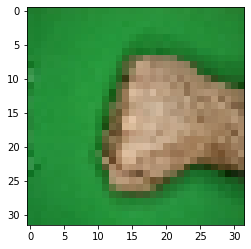

Rock


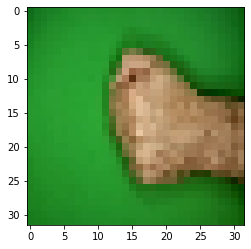

Rock


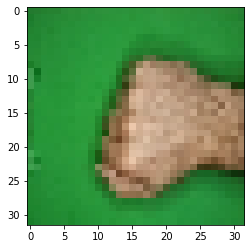

Rock


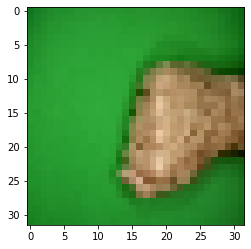

Rock


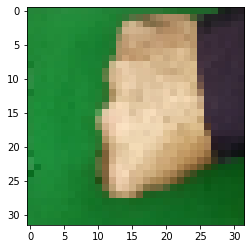

Rock


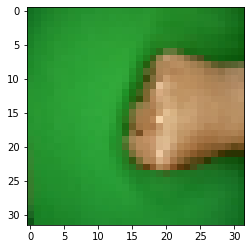

Rock


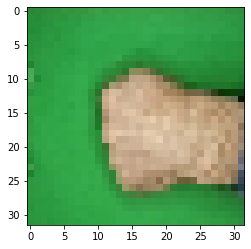

Rock


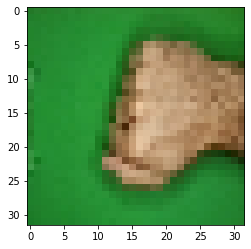

Rock


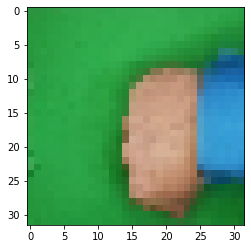

Rock


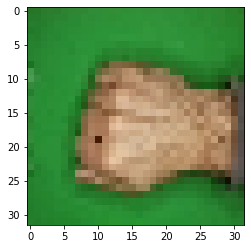

Rock


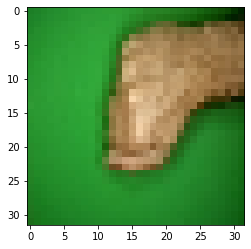

Rock


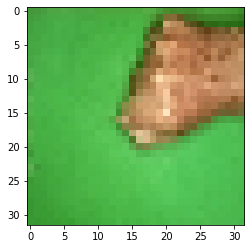

Rock


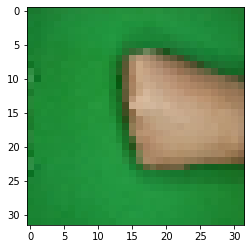

Rock


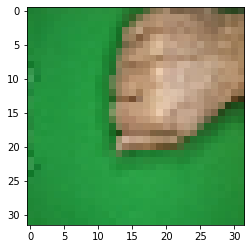

Rock


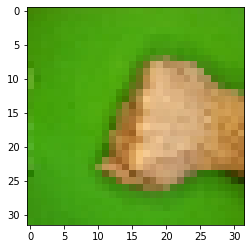

Rock


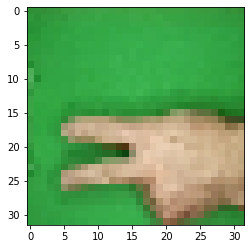

Scissors


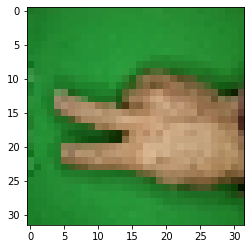

Scissors


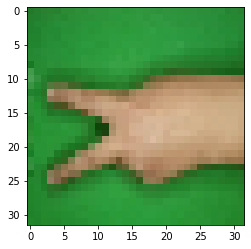

Scissors


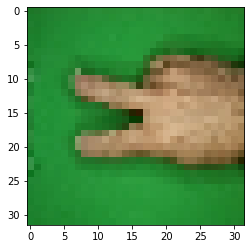

Scissors


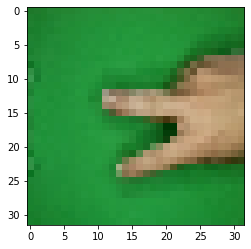

Scissors


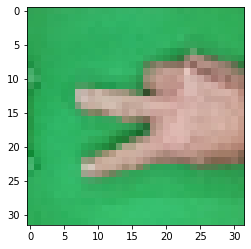

Scissors


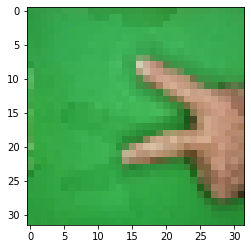

Scissors


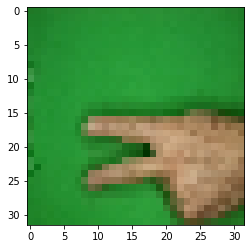

Scissors


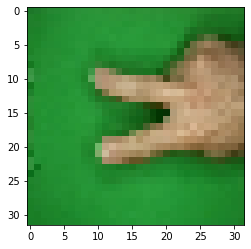

Scissors


In [28]:
dir_path = "/content/drive/My Drive/dataset/test_set"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"/"+i , target_size=(32,32,3))
    plt.imshow(img)
    plt.show()
    test_image = image.img_to_array(img) 
    test_image = np.expand_dims(test_image, axis=0)
    test_images = np.vstack([test_image])
    test_image = test_image.astype('float32')
    test_image /= 255.
    result = cnn.predict_classes(test_image)
    if result[0] == 2:
      print("Scissors")
    elif result[0] == 1:
      print('Rock')
    else:
      print("Paper")